In [1]:
import os
import glob
import pandas as pd

x = glob.glob('./results/*.csv')
x

['./results/SelectionSort.csv',
 './results/HeapSort.csv',
 './results/MergeSort.csv',
 './results/BubbleSort.csv',
 './results/RadixSort.csv',
 './results/InsertionSort.csv',
 './results/ShellSort.csv',
 './results/RandomizedQuickSort.csv',
 './results/CountingSort.csv']

In [2]:
result_df = pd.DataFrame()
for csv in x:
    df = pd.read_csv(csv)
    df['sorter'] = csv.split('.')[1].split('/')[-1]
    result_df = pd.concat([result_df, df], axis=0)
result_df.sample(10)

,elapsed_time,size,min_value,max_value,success,sorter
274,0.000605,100,100000,100000000,True,HeapSort
491,0.184335,25000,1000000,10000000,True,RandomizedQuickSort
494,6.052278,50000,0,100,True,RandomizedQuickSort
598,1.728980,100000,0,100000,True,HeapSort
240,0.000208,100,0,10000000,True,ShellSort
404,0.083758,10000,10000,1000000,True,ShellSort
193,0.000026,10,0,100000,True,BubbleSort
222,0.000090,10,1000,100000000,True,RadixSort
198,0.000013,10,1,100,True,ShellSort
380,5.620264,10000,1,10000,True,SelectionSort


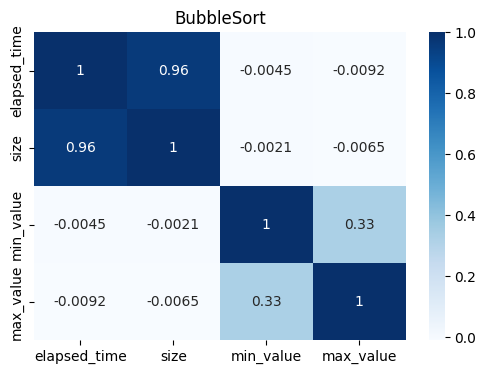

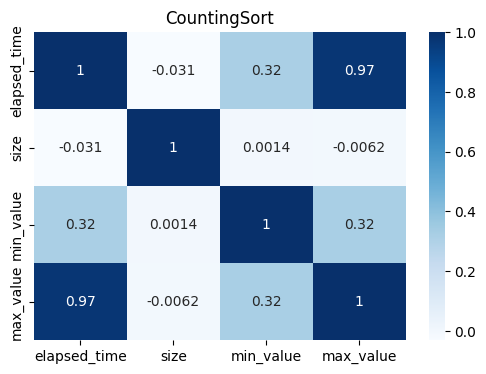

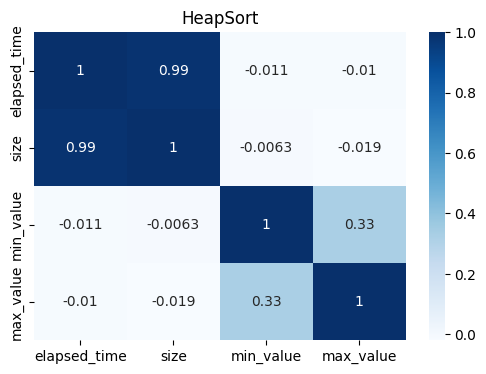

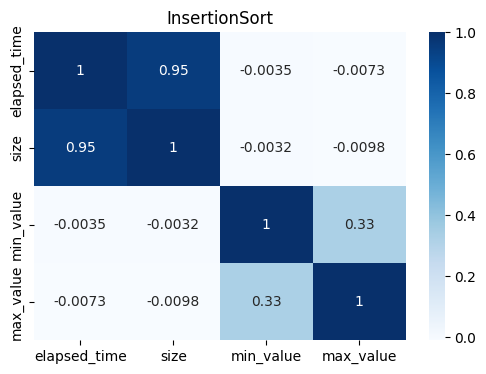

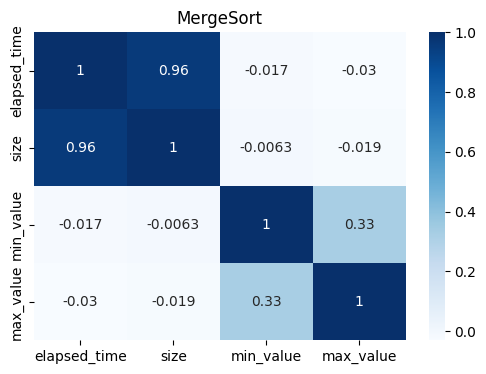

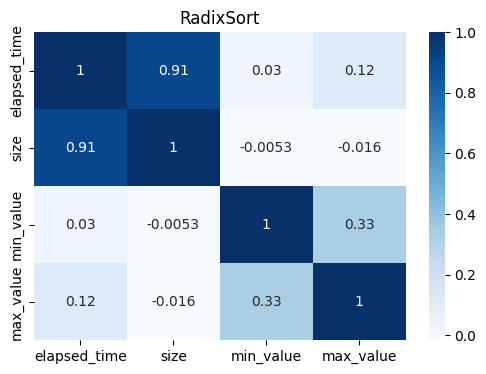

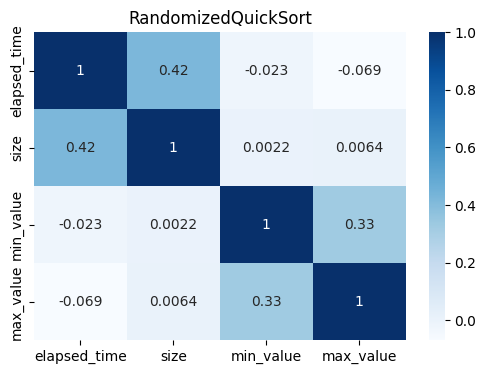

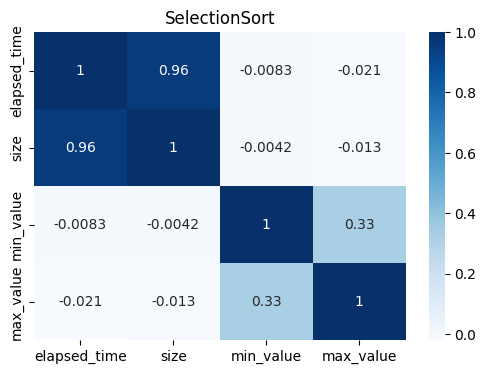

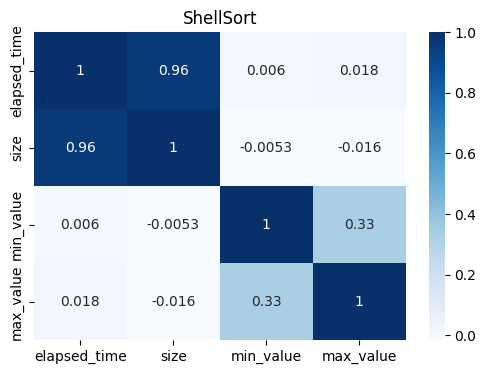

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sorters = sorted(result_df['sorter'].unique())

# Assuming your DataFrame is named 'result_df'
numeric_columns = ['elapsed_time', 'size', 'min_value', 'max_value']

# Calculate and visualize the correlation matrix for each unique sorter
for sorter in sorters:
    sorter_df = result_df[result_df['sorter'] == sorter]
    numeric_df = sorter_df[numeric_columns]
    correlation_matrix = numeric_df.corr()
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, cmap="Blues", annot=True)
    plt.title(f"{sorter}")
    plt.show()


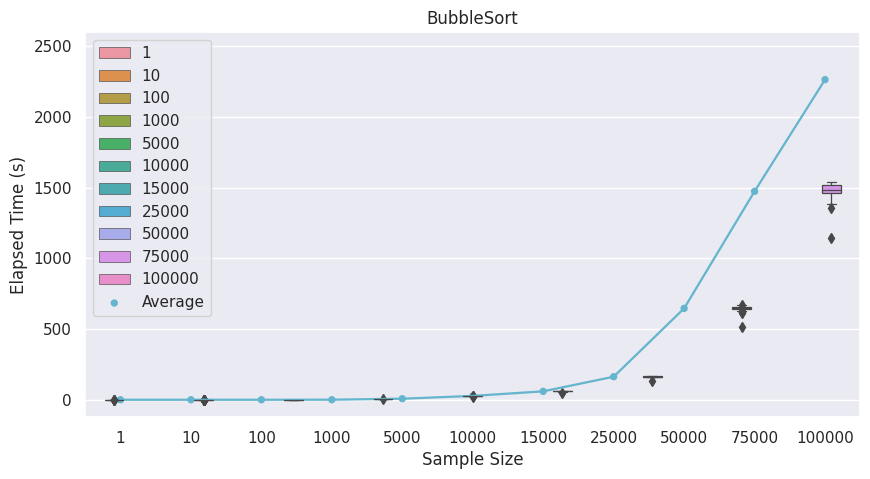

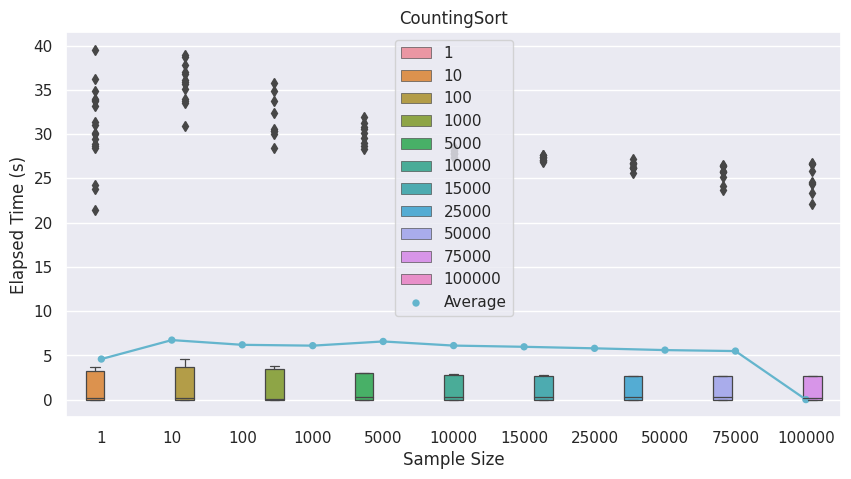

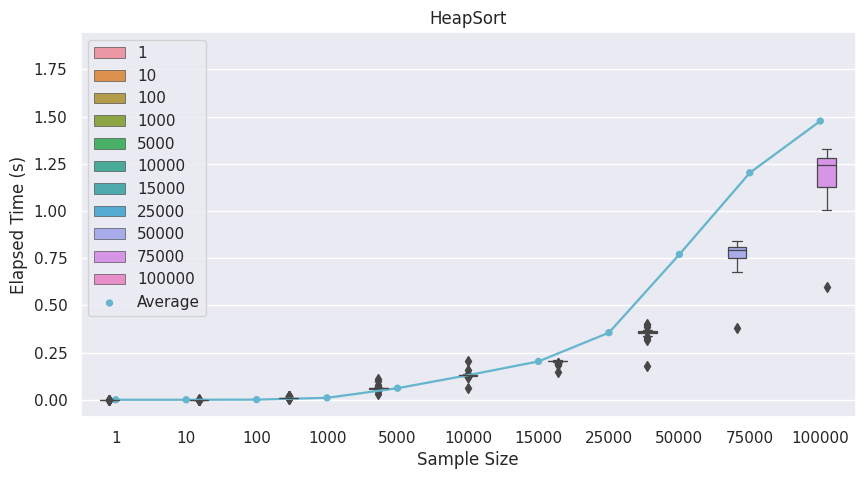

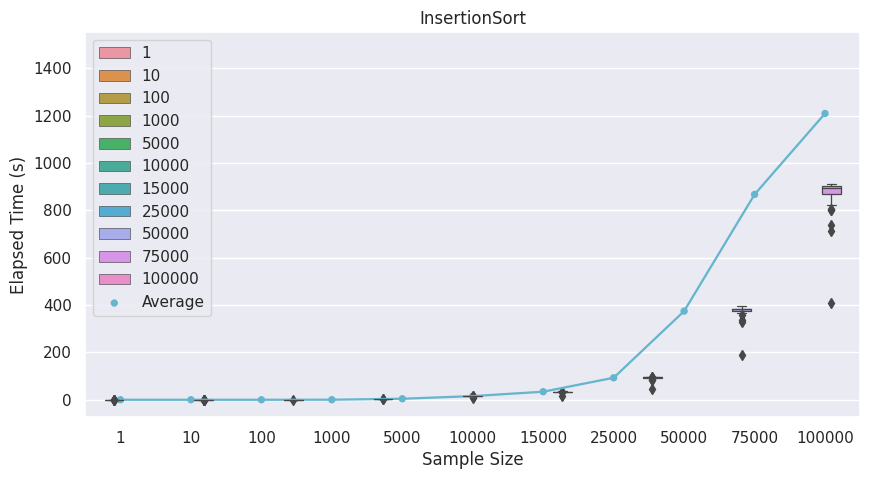

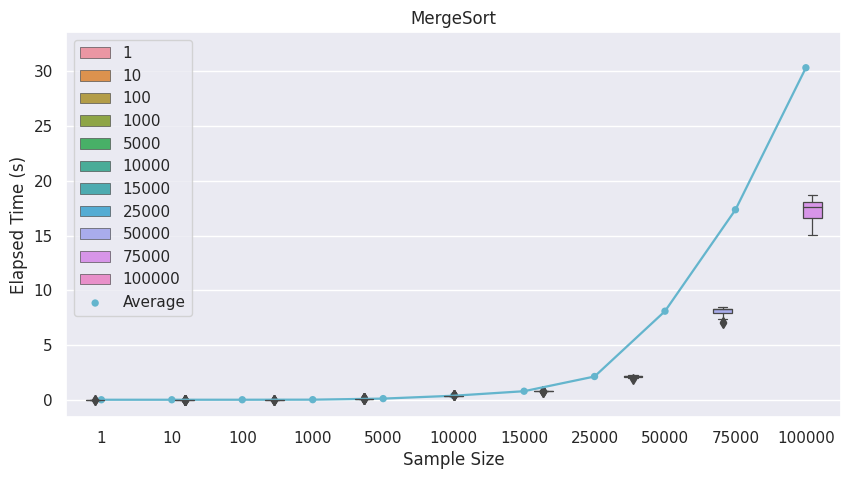

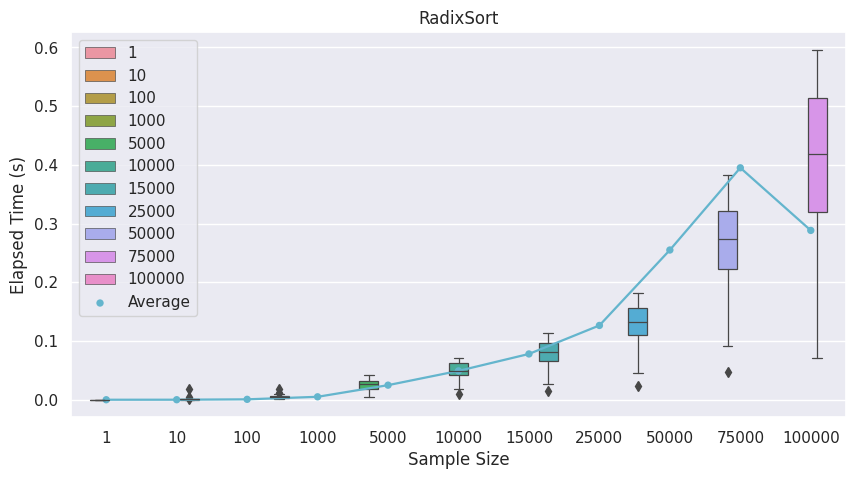

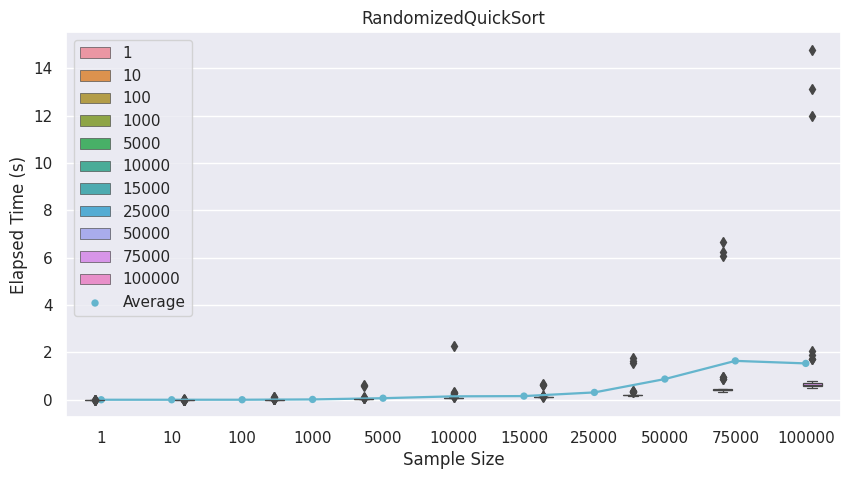

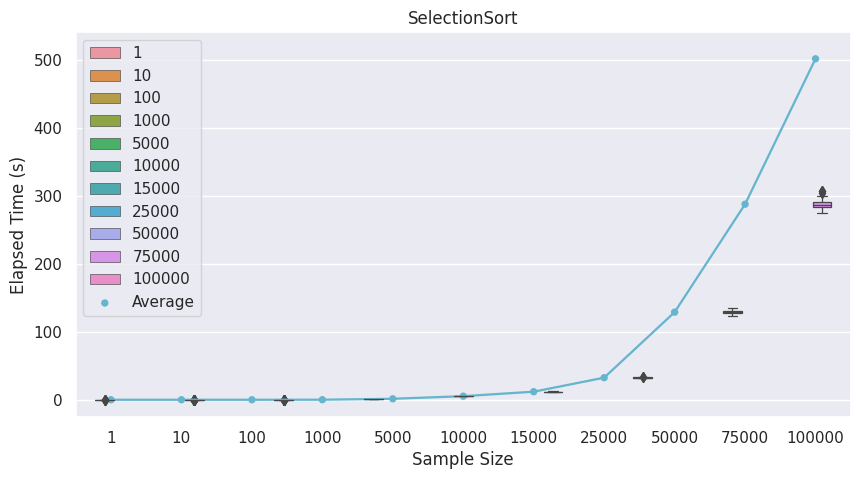

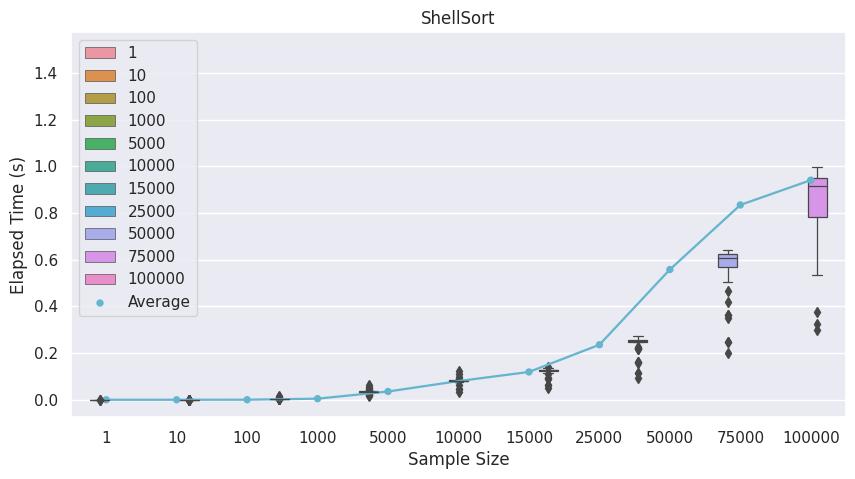

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"lines.linewidth": 0.9})

for sorter in sorters:
    sorter_df = result_df[result_df['sorter'] == sorter]

    # Create a new figure for each sorter
    plt.figure(figsize=(10, 5))
    # Plot the box plot
    sns.boxplot(x='size', y='elapsed_time', data=sorter_df, hue='size', width=3)

    # Plot the mean line
    time_trend = sorter_df.groupby('size')['elapsed_time'].mean().reset_index()
    sns.pointplot(data=time_trend, x='size', y='elapsed_time', label='Average', color="c")

    plt.xlabel('Sample Size')
    plt.ylabel('Elapsed Time (s)')
    plt.title(f'{sorter}')
    plt.legend()
    plt.show()


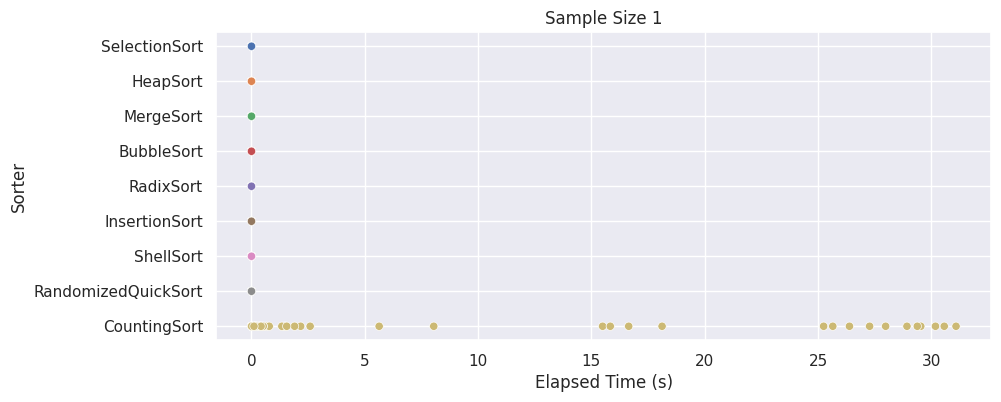

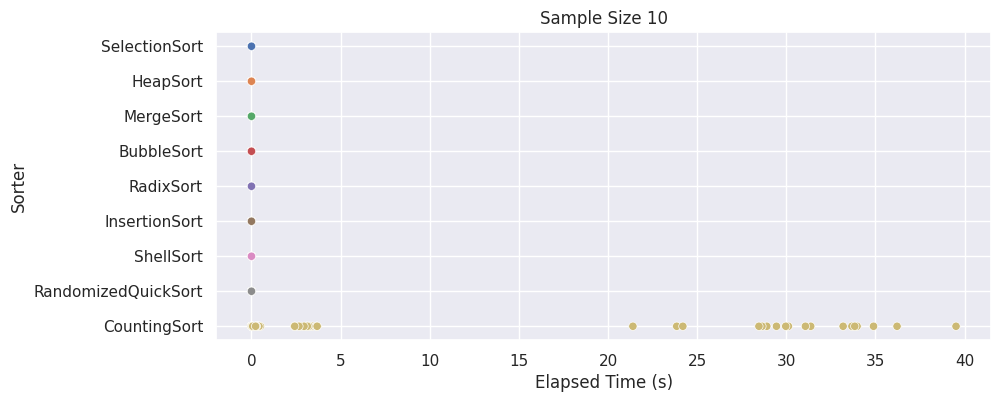

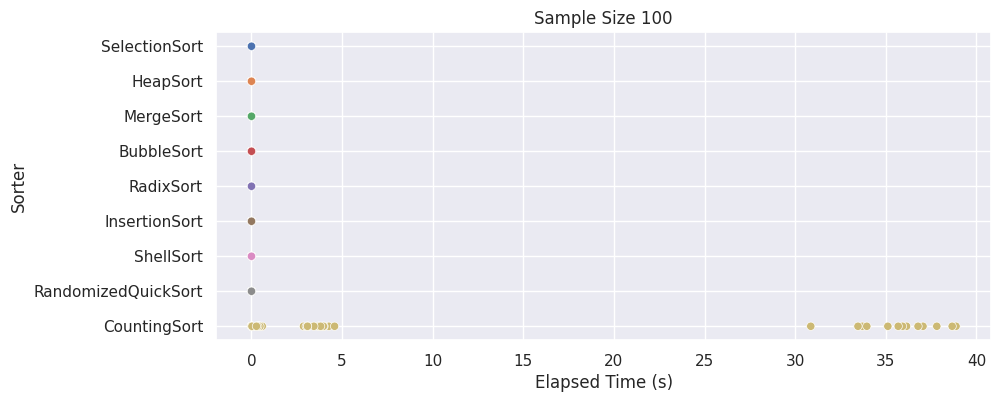

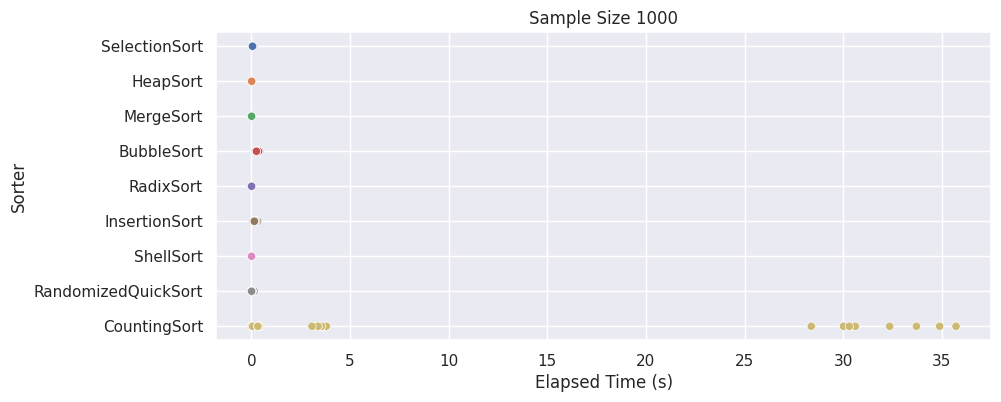

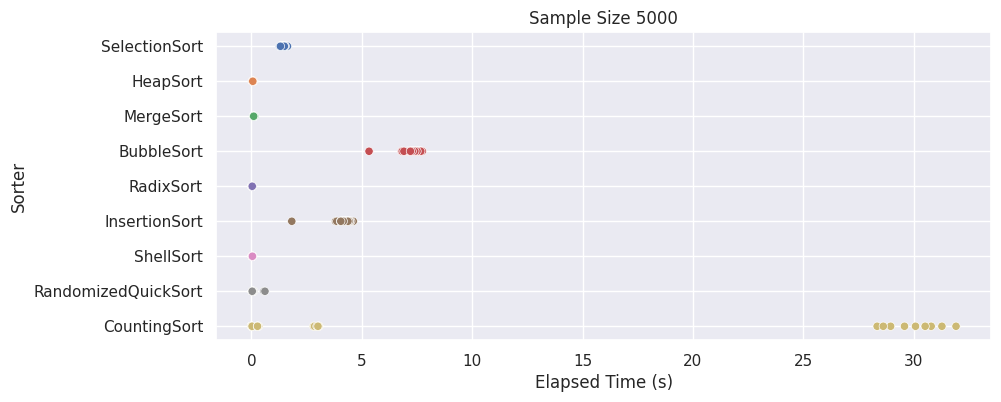

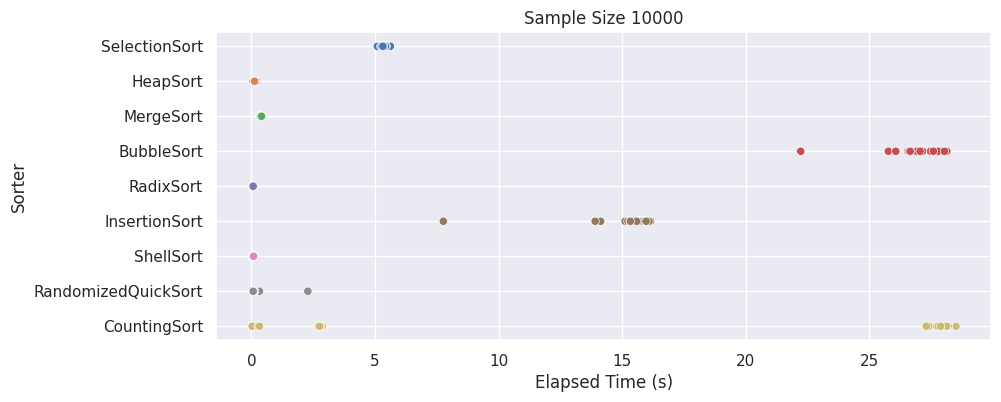

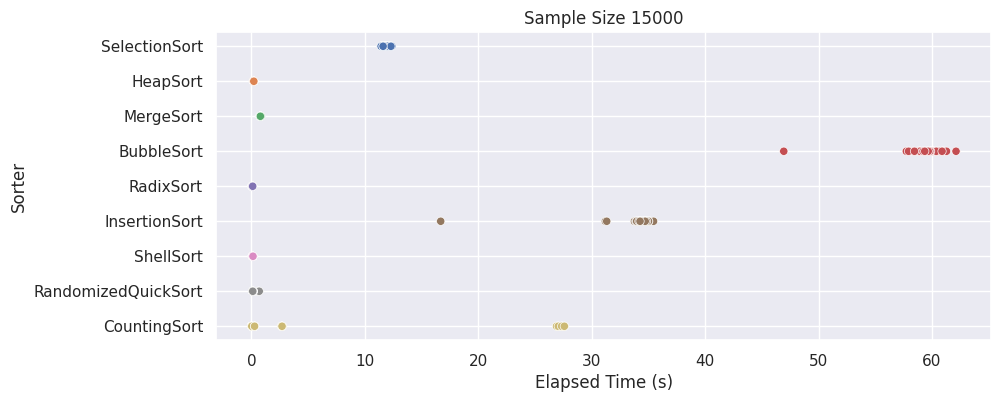

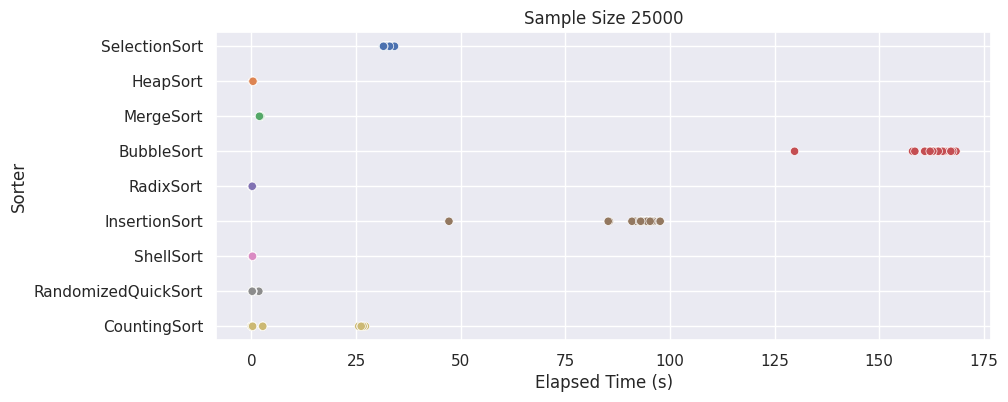

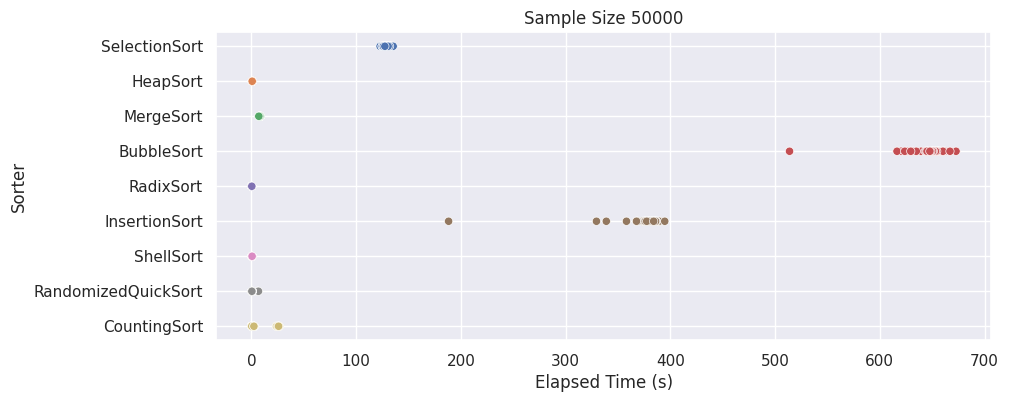

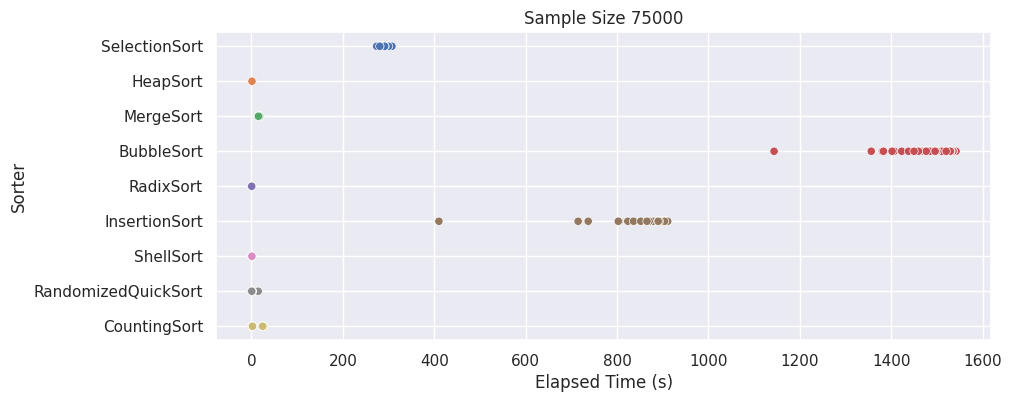

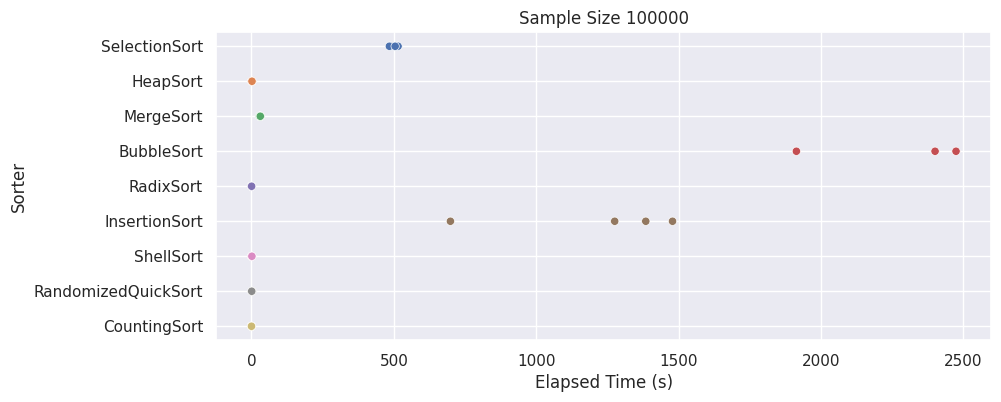

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sizes = result_df['size'].unique()
for size in sizes:
    sorter_df = result_df[result_df['size'] == size]
    time_trend = sorter_df
    plt.figure(figsize=(10, 4))
    # Create a new figure for each sorter
    # Plot the scatter values
    sns.scatterplot(x='elapsed_time', y='sorter', data=sorter_df, hue='sorter', legend=False)
    # Plot the mean with scatter markers
    # plt.scatter(time_mean.index, time_mean.values, marker='o', color='red', label='Mean')

    plt.ylabel('Sorter')
    plt.xlabel('Elapsed Time (s)')
    plt.title(f'Sample Size {size}')
    plt.show()
